In [1]:
from qiskit import IBMQ
IBMQ.save_account('67b6e1adc0932d32695abbbae7584945b21d1e18408b56624f052c7addaecacca817e2ebf6702b879f0ad4ec88247ec112bbc456968ce6dd8070cf4a4aba3430')

In [2]:
#必要なモジュールのインポート
from qiskit import IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
from qiskit.qasm import pi
from qiskit.tools.visualization import plot_histogram, circuit_drawer
import numpy as np

In [3]:
# 自分のアカウント情報をloadする。（あらかじめ IBMQ.save_account を実行しておく必要がある. 複数のアカウントを使い分ける時はここで行う)
provider = IBMQ.load_account()

# 自分のアカウントで使用できるバックエンドを見る
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [10]:
from qiskit.providers.ibmq import least_busy
backend_lb = least_busy(provider.backends(simulator=False, operational=True))
print("Least busy backend:", backend_lb)

Least busy backend: ibmq_armonk


{'00': 2005, '11': 2091}


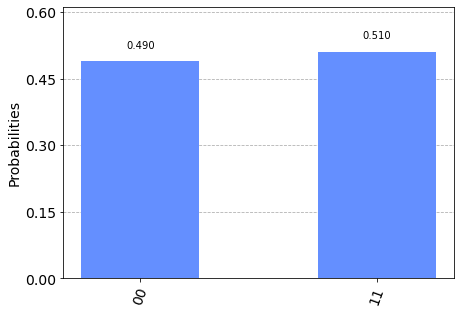

In [11]:
#量子レジスタqを生成する。
q = QuantumRegister(2)

#古典レジスタcを生成する
c = ClassicalRegister(2)

#量子レジスタqと古典レジスタc間で量子回路を生成する。
qc = QuantumCircuit(q, c)

#1番目の量子ビットにHゲートをかける。
qc.h(q[0])

#1-2番目の量子ビットにCNOTゲートをかける。(1番目の量子ビットが制御量子ビット、2番目の量子ビットがコントロール量子ビット)
qc.cx(q[0],q[1])

#1番目の量子ビットの測定値を1番目の古典ビットに、2番目の量子ビットの測定値を2番目の古典ビットに渡す。
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])

#localのシミュレータとleast busyなbackend
backend_sim = Aer.get_backend("qasm_simulator")

#量子回路qcを指定したバックエンド(backend_sim)で4096回実行する。
result = execute(qc, backend_sim, shots=4096).result()

#結果を出力する。
print(result.get_counts(qc))

#結果のヒストグラムを描画する。
plot_histogram(result.get_counts(qc))

In [14]:
#least busyだったbackendを選ぶ
backend_sim = backend_lb

#量子回路qcを指定したバックエンド(backend_sim)で4096回実行する。
result = execute(qc, backend_sim, shots=4096).result()
#結果を出力する。
print(result.get_counts(qc))

#結果のヒストグラムを描画する。
plot_histogram(result.get_counts(qc))

TranspilerError: 'Number of qubits (2) in circuit-110 is greater than maximum (1) in the coupling_map'